In [1]:
#wt
#lipidomics_metabolomics_transcriptomics(kupffer cells)
#filtering


In [2]:
#import necessary libraries:
from mofapy2.run.entry_point import entry_point
import pandas as pd
import numpy as np
import requests

ent= entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [3]:
#load lipidomics data:
lipidomics = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/DataMatrix_wtLipidomics_2023_01_30.csv")
#print(lipidomics.shape)
print(lipidomics.shape)
lipidomics

(660, 29)


,Unnamed: 0,CD_CD_CD_103,CD_CD_CD_105,CD_CD_CD_106,CD_CD_HFD_200,CD_CD_HFD_201,CD_CD_HFD_203,CD_CD_HFD_205,CD_CD_HFD_206,CD_CD_HFD_207,...,HFD_HFD_CD_602,HFD_HFD_CD_603,HFD_HFD_CD_604,HFD_HFD_CD_605,HFD_HFD_CD_606,HFD_HFD_HFD_500,HFD_HFD_HFD_501,HFD_HFD_HFD_502,HFD_HFD_HFD_503,HFD_HFD_HFD_504
0,Car(14:2),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.022679,0.012631,0.000000,0.018628,0.000000,0.000000
1,Car(14:1),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016026,0.000000,0.000000,0.000000,0.000000,0.000000
2,Car(14:0),0.035796,0.059788,0.102324,0.067638,0.034614,0.041253,0.053345,0.025642,0.062604,...,0.039922,0.034776,0.026156,0.035579,0.072976,0.038821,0.053324,0.044581,0.172271,0.061797
3,Car(16:2),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Car(16:1),0.034216,0.045847,0.047364,0.036504,0.050584,0.055673,0.027771,0.033463,0.054042,...,0.000000,0.038772,0.027969,0.038150,0.082187,0.029650,0.037699,0.062968,0.038900,0.041276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,TAG(61:8)_TAGODD,0.414630,0.576205,0.189522,0.639735,0.447826,1.437870,0.398621,0.430603,0.225338,...,0.502622,0.746531,1.530204,22.932997,1.846626,0.691624,2.360735,1.604558,0.116157,0.316657
656,TAG(61:7)_TAGODD,0.431361,0.480428,0.106920,0.450315,0.283981,1.736179,0.411845,0.428490,-0.000249,...,0.184296,0.051279,1.391812,15.206841,1.684688,0.612688,2.817626,2.750158,0.237528,0.137820
657,TAG(61:6)_TAGODD,0.000000,0.000000,0.000000,-0.000248,-0.000269,-0.000306,0.250061,-0.000221,0.000000,...,0.000000,0.000000,-0.000314,2.474071,-0.000295,0.119433,0.000000,0.000000,0.038956,0.028073
658,TAG(61:5)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051895,0.000000,...,0.000000,0.000000,0.000000,1.317206,0.134132,0.000000,0.000000,0.000000,0.057229,0.066653


In [4]:
#remove features with more than 50% missing values:
data = []
for i in lipidomics.columns:
     #print(lipidomics[i].eq(0).mean())
     if lipidomics[i].eq(0).mean() <= 0.3:
        data.append(lipidomics[i])
lipidomics_wt = pd.DataFrame(data)
print(lipidomics_wt.shape)
lipidomics_wt

(24, 660)


,0,1,2,3,4,5,6,7,8,9,...,650,651,652,653,654,655,656,657,658,659
Unnamed: 0,Car(14:2),Car(14:1),Car(14:0),Car(16:2),Car(16:1),Car(16:0),Car(18:2),Car(18:1),Car(18:0),Car(20:2),...,TAG(59:2)_TAGODD,TAG(59:1)_TAGODD,TAG(59:0)_TAGODD,TAG(61:10)_TAGODD,TAG(61:9)_TAGODD,TAG(61:8)_TAGODD,TAG(61:7)_TAGODD,TAG(61:6)_TAGODD,TAG(61:5)_TAGODD,TAG(61:4)_TAGODD
CD_CD_CD_103,0.0,0.0,0.035796,0.0,0.034216,0.101562,0.045423,0.107916,0.077571,0.0,...,0.162319,0.03282,0.0,0.195594,0.245285,0.41463,0.431361,0.0,0.0,0.0
CD_CD_CD_105,0.0,0.0,0.059788,0.0,0.045847,0.134982,0.042569,0.151249,0.109694,0.0,...,0.350367,0.138855,0.127094,0.178552,0.104911,0.576205,0.480428,0.0,0.0,0.0
CD_CD_CD_106,0.0,0.0,0.102324,0.0,0.047364,0.157014,0.080287,0.137623,0.133206,0.015809,...,0.0,0.046702,0.0,0.073797,0.051413,0.189522,0.10692,0.0,0.0,0.0
CD_CD_HFD_200,0.0,0.0,0.067638,0.0,0.036504,0.09636,0.050425,0.114681,0.131625,0.0,...,0.224697,-0.000248,0.0,0.0,0.397482,0.639735,0.450315,-0.000248,0.0,0.0
CD_CD_HFD_201,0.0,0.0,0.034614,0.0,0.050584,0.189367,0.066934,0.244214,0.119176,0.0,...,0.474345,0.139341,0.0,0.0,0.164217,0.447826,0.283981,-0.000269,0.0,0.0
CD_CD_HFD_205,0.0,0.0,0.053345,0.0,0.027771,0.177136,0.046442,0.131215,0.242675,0.0,...,0.543948,0.090513,0.0,0.0,0.231534,0.398621,0.411845,0.250061,0.0,0.0
CD_CD_HFD_206,0.0,0.0,0.025642,0.0,0.033463,0.173237,0.065752,0.17161,0.220315,0.0,...,0.103096,0.021195,0.03459,0.236292,0.206013,0.430603,0.42849,-0.000221,0.051895,0.0
CD_CD_HFD_207,0.0,0.0,0.062604,0.0,0.054042,0.249863,0.091638,0.063861,0.338595,0.0,...,0.168113,0.087839,0.0,0.0,0.117505,0.225338,-0.000249,0.0,0.0,0.0
HFD_CD_CD_800,0.0,0.0,0.042316,0.0,0.053673,0.224876,0.041312,0.256484,0.201164,0.0,...,0.151502,0.105535,0.0,0.0,0.784354,1.86628,1.669939,-0.000279,0.0,0.0


In [5]:
lipidomics_wt.head()
lipidomics= lipidomics_wt.T
lipidomics.head()
lipidomics.shape

(660, 24)

In [6]:
data = []
for i in range(len(lipidomics)):
     #print(lipidomics.iloc[i].eq(0).mean())
     if lipidomics.iloc[i, 1:].eq(0).mean() <= 0.3:
        data.append(lipidomics.iloc[i])
lipidomics_remove_rows = pd.DataFrame(data)
lipidomics_remove_rows
lipidomics_remove_rows

,Unnamed: 0,CD_CD_CD_103,CD_CD_CD_105,CD_CD_CD_106,CD_CD_HFD_200,CD_CD_HFD_201,CD_CD_HFD_205,CD_CD_HFD_206,CD_CD_HFD_207,HFD_CD_CD_800,...,HFD_CD_HFD_703,HFD_HFD_CD_601,HFD_HFD_CD_603,HFD_HFD_CD_604,HFD_HFD_CD_605,HFD_HFD_CD_606,HFD_HFD_HFD_500,HFD_HFD_HFD_501,HFD_HFD_HFD_503,HFD_HFD_HFD_504
2,Car(14:0),0.035796,0.059788,0.102324,0.067638,0.034614,0.053345,0.025642,0.062604,0.042316,...,0.024352,0.050808,0.034776,0.026156,0.035579,0.072976,0.038821,0.053324,0.172271,0.061797
4,Car(16:1),0.034216,0.045847,0.047364,0.036504,0.050584,0.027771,0.033463,0.054042,0.053673,...,0.032226,0.047815,0.038772,0.027969,0.038150,0.082187,0.029650,0.037699,0.038900,0.041276
5,Car(16:0),0.101562,0.134982,0.157014,0.096360,0.189367,0.177136,0.173237,0.249863,0.224876,...,0.144345,0.296427,0.151589,0.128743,0.169041,0.312758,0.173216,0.206656,0.208344,0.229369
6,Car(18:2),0.045423,0.042569,0.080287,0.050425,0.066934,0.046442,0.065752,0.091638,0.041312,...,0.042143,0.053998,0.045318,0.022009,0.034643,0.089726,0.051369,0.064699,0.050062,0.069832
7,Car(18:1),0.107916,0.151249,0.137623,0.114681,0.244214,0.131215,0.171610,0.063861,0.256484,...,0.140085,0.327171,0.264518,0.111655,0.079305,0.279146,0.188603,0.200502,0.184250,0.228647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,TAG(59:3)_TAGODD,0.074169,0.197051,0.063417,0.146121,0.375943,0.313717,0.204373,0.140151,0.518644,...,0.176050,0.777572,0.332164,0.835389,4.845042,0.397235,0.859992,0.291849,0.123324,0.402113
650,TAG(59:2)_TAGODD,0.162319,0.350367,0.000000,0.224697,0.474345,0.543948,0.103096,0.168113,0.151502,...,0.282322,0.166932,0.000000,0.158944,1.081367,0.290992,0.784703,0.933941,0.421710,0.291262
654,TAG(61:9)_TAGODD,0.245285,0.104911,0.051413,0.397482,0.164217,0.231534,0.206013,0.117505,0.784354,...,0.132957,0.000000,0.000000,0.655594,18.724244,3.054841,0.774482,1.387182,0.000000,0.229220
655,TAG(61:8)_TAGODD,0.414630,0.576205,0.189522,0.639735,0.447826,0.398621,0.430603,0.225338,1.866280,...,0.228778,2.170027,0.746531,1.530204,22.932997,1.846626,0.691624,2.360735,0.116157,0.316657


In [7]:
#remove 10% of the rows randomly:
lipidomics_remove_rows = lipidomics_remove_rows.sample(frac=0.9)
lipidomics_remove_rows


,Unnamed: 0,CD_CD_CD_103,CD_CD_CD_105,CD_CD_CD_106,CD_CD_HFD_200,CD_CD_HFD_201,CD_CD_HFD_205,CD_CD_HFD_206,CD_CD_HFD_207,HFD_CD_CD_800,...,HFD_CD_HFD_703,HFD_HFD_CD_601,HFD_HFD_CD_603,HFD_HFD_CD_604,HFD_HFD_CD_605,HFD_HFD_CD_606,HFD_HFD_HFD_500,HFD_HFD_HFD_501,HFD_HFD_HFD_503,HFD_HFD_HFD_504
67,DAG(34:4),0.491287,0.596050,0.470092,0.326771,0.426068,0.414291,0.198262,0.232090,0.859498,...,0.295135,0.806096,0.668286,1.047797,1.379489,2.614287,0.549705,0.675029,0.249004,0.519860
253,PC(38:7),258.398727,193.903942,127.621167,117.936113,154.337379,137.955874,105.783019,115.482746,141.177874,...,148.586751,131.585539,220.536156,135.129065,149.570390,190.647607,179.085393,90.959294,307.292541,159.131432
350,PG(30:0),0.555665,0.297197,0.442271,0.241433,0.533854,0.376456,0.136402,0.413154,0.710858,...,0.228749,0.514203,0.369351,0.700345,0.770847,0.881441,0.621031,0.439742,1.016669,0.324518
600,TAG(49:10)_TAGODD,2.662857,1.013823,0.216823,2.727962,2.941995,6.180947,4.048260,3.500319,2.645135,...,3.231702,1.170477,3.998278,2.075446,0.806891,3.264836,4.027905,10.052770,1.577216,3.619081
89,DAG(40:3),0.545539,0.535661,0.442669,0.349417,0.751038,0.649118,0.370176,0.269785,0.699277,...,0.599296,1.177951,0.443050,0.524130,0.569878,1.060041,0.735626,0.529801,0.502242,0.737487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,TAG(50:2)_TAG,758.989380,1119.706013,1058.872532,754.396671,793.168123,959.414130,523.036224,391.146243,3128.759989,...,501.106810,1869.170429,2975.808996,4928.737782,1605.132632,1640.257369,1653.344416,4244.300477,499.543568,717.210714
72,DAG(36:5),0.815214,1.041422,0.910126,0.597147,0.750119,1.003233,0.572844,0.784074,1.263499,...,0.644428,1.330917,0.854013,1.019918,2.875185,4.422827,0.975075,1.026321,0.449088,1.030185
217,PA(34:4),0.353094,0.497431,0.589471,0.855106,0.513080,0.353668,0.637394,0.392051,0.734665,...,0.432330,0.539179,0.358846,0.380666,0.363465,0.543643,0.577957,0.536853,0.524396,0.420261
109,DiHexCer(d18:1/20:1),0.326800,0.346816,0.418279,0.335554,0.304887,0.747189,0.292418,0.421762,0.899391,...,0.232998,0.933268,0.532494,0.632841,0.506600,0.862830,0.500470,1.938083,0.319202,0.397581


In [8]:
#lipodomics data:
data_list = []

for i in range(len(lipidomics_remove_rows)):
    row = lipidomics_remove_rows.iloc[i, 1:].T.reset_index()
    row.columns = ['sample', 'value']  
    #print(row)
   
    feature = lipidomics_remove_rows.iloc[i, 0] 
    #print(feature)
    
    
    row['feature'] = feature
    
    
    lipid_class = feature.split("(")[0]
    #print(lipid_class)

    row['view'] = "Lipidomics"

    
    
    row['group'] = "group_lipidomics_wt"
    data_list.append(row)

df1_lipidomics = pd.concat(data_list, ignore_index=True)

df1_lipidomics


,sample,value,feature,view,group
0,CD_CD_CD_103,0.491287,DAG(34:4),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_105,0.59605,DAG(34:4),Lipidomics,group_lipidomics_wt
2,CD_CD_CD_106,0.470092,DAG(34:4),Lipidomics,group_lipidomics_wt
3,CD_CD_HFD_200,0.326771,DAG(34:4),Lipidomics,group_lipidomics_wt
4,CD_CD_HFD_201,0.426068,DAG(34:4),Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
9126,HFD_HFD_CD_606,1.338696,PE(42:5),Lipidomics,group_lipidomics_wt
9127,HFD_HFD_HFD_500,1.680172,PE(42:5),Lipidomics,group_lipidomics_wt
9128,HFD_HFD_HFD_501,1.578375,PE(42:5),Lipidomics,group_lipidomics_wt
9129,HFD_HFD_HFD_503,1.990734,PE(42:5),Lipidomics,group_lipidomics_wt


In [9]:
#remove missing values:
final_lipodomics= df1_lipidomics[df1_lipidomics["value"] != 0]
final_lipodomics.head()
final_lipodomics.shape

(8908, 5)

In [10]:
#Normalization of lipidomics data:
#log2:
final_lipodomics["value"] = final_lipodomics["value"].apply(lambda x: np.log2(x + 1))
final_lipodomics

,sample,value,feature,view,group
0,CD_CD_CD_103,0.576558,DAG(34:4),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_105,0.674506,DAG(34:4),Lipidomics,group_lipidomics_wt
2,CD_CD_CD_106,0.555907,DAG(34:4),Lipidomics,group_lipidomics_wt
3,CD_CD_HFD_200,0.407919,DAG(34:4),Lipidomics,group_lipidomics_wt
4,CD_CD_HFD_201,0.512043,DAG(34:4),Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
9126,HFD_HFD_CD_606,1.225704,PE(42:5),Lipidomics,group_lipidomics_wt
9127,HFD_HFD_HFD_500,1.422326,PE(42:5),Lipidomics,group_lipidomics_wt
9128,HFD_HFD_HFD_501,1.366462,PE(42:5),Lipidomics,group_lipidomics_wt
9129,HFD_HFD_HFD_503,1.580500,PE(42:5),Lipidomics,group_lipidomics_wt


In [11]:
#sort values ascending:
final_lipodomics = final_lipodomics.sort_values(by = "value", ascending = False)
final_lipodomics.head()

,sample,value,feature,view,group
4965,HFD_HFD_HFD_501,13.894826,TAG(52:3)_TAG,Lipidomics,group_lipidomics_wt
4988,HFD_HFD_HFD_501,13.865746,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
4984,HFD_HFD_CD_604,13.540706,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
4978,HFD_CD_CD_803,13.432930,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
4983,HFD_HFD_CD_603,13.176331,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt


In [12]:
final_lipodomics.describe()

,value
count,8908.000000
mean,3.146971
std,2.840960
min,-0.000885
25%,0.832069
50%,2.255389
75%,4.750190
max,13.894826


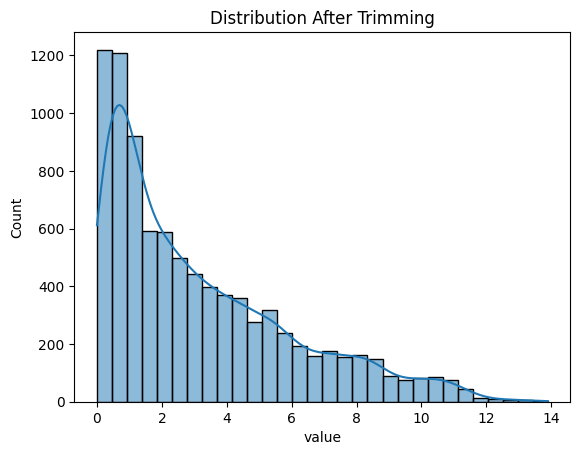

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()


In [14]:
#remove values less than 0.8:
final_lipodomics = final_lipodomics[final_lipodomics["value"] >= 0.6]
final_lipodomics


,sample,value,feature,view,group
4965,HFD_HFD_HFD_501,13.894826,TAG(52:3)_TAG,Lipidomics,group_lipidomics_wt
4988,HFD_HFD_HFD_501,13.865746,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
4984,HFD_HFD_CD_604,13.540706,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
4978,HFD_CD_CD_803,13.432930,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
4983,HFD_HFD_CD_603,13.176331,TAG(52:2)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
6109,HFD_HFD_CD_601,0.602436,DAG(40:1),Lipidomics,group_lipidomics_wt
4303,CD_CD_CD_106,0.601996,TAG(60:4)_TAG,Lipidomics,group_lipidomics_wt
5400,HFD_HFD_CD_606,0.601000,TAG(37:0)_TAGODD,Lipidomics,group_lipidomics_wt
8337,HFD_CD_HFD_701,0.600876,LPE(20:3),Lipidomics,group_lipidomics_wt


In [15]:
#remove values greater than 4:
final_lipodomics = final_lipodomics[final_lipodomics["value"] <= 4.6]
final_lipodomics

,sample,value,feature,view,group
7098,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
8121,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
3118,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
1336,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
6326,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
6109,HFD_HFD_CD_601,0.602436,DAG(40:1),Lipidomics,group_lipidomics_wt
4303,CD_CD_CD_106,0.601996,TAG(60:4)_TAG,Lipidomics,group_lipidomics_wt
5400,HFD_HFD_CD_606,0.601000,TAG(37:0)_TAGODD,Lipidomics,group_lipidomics_wt
8337,HFD_CD_HFD_701,0.600876,LPE(20:3),Lipidomics,group_lipidomics_wt


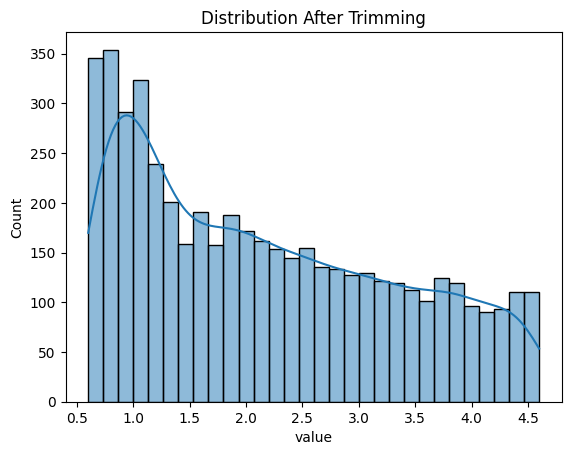

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()


In [17]:
final_lipodomics[:100]

,sample,value,feature,view,group
7098,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
8121,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
3118,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
1336,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
6326,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
4751,HFD_CD_HFD_703,4.481397,TAG(48:2)_TAG,Lipidomics,group_lipidomics_wt
1494,HFD_HFD_HFD_504,4.480172,SM(22:1),Lipidomics,group_lipidomics_wt
4183,HFD_HFD_HFD_501,4.479254,DAG(32:0),Lipidomics,group_lipidomics_wt
7721,HFD_HFD_CD_604,4.478537,TAG(60:12)_TAG,Lipidomics,group_lipidomics_wt


In [18]:
final_lipodomics.describe()

,value
count,4958.000000
mean,2.163063
std,1.164103
min,0.600684
25%,1.105254
50%,1.956500
75%,3.081161
max,4.598996


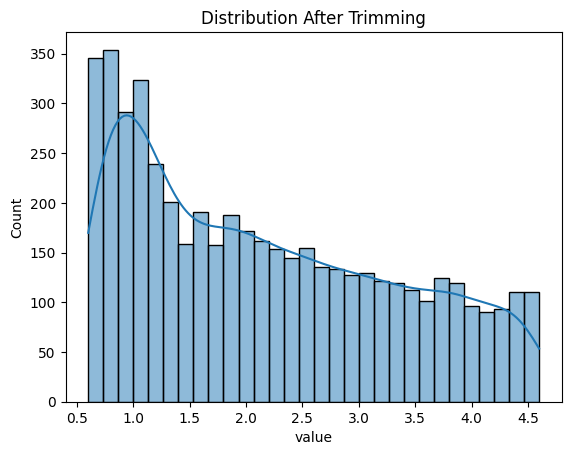

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
#%pip install openpyxl

metabolomics = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/batch_norm_imput_data.csv",  sep = ";", on_bad_lines='skip')
#print(metabolomics)

metabolomics  

,PARENT_SAMPLE_NAME,30,35,49,50,55,62,71,92,93,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
0,UHBO-00909,"1,263196724","2,781068393","1,067288109","2,3889985","0,492861356","0,985890183","1,348984509","1,557138045","1,201718137",...,"1,795209217","6,145397418","6,972877995","2,692085735","6,94147986","4,284333484","5,217145312","2,515704587","1,175637572","1,121925273"
1,UHBO-00910,"0,96967371","1,482323505","0,941553736","1,14978295","1,422265125","1,155380774","1,303805111","1,506549568","1,087771034",...,"1,166187671","0,604053744","0,83499901","0,825704352",1,"1,233749778","0,859976006","2,011541654","1,214253515","1,597948924"
2,UHBO-00911,"0,989362284","1,000188589","0,292503035","1,191345398","2,279249698","0,916144988","1,001006223","1,664515921","0,354855299",...,"0,307111688","0,135016295","0,165083475","0,129196883","0,089722382","0,050782213","0,422308456","0,213165489","0,863098939","0,51736125"
3,UHBO-00912,"0,953683827","0,979320902","1,531404218","0,94494098","0,493600748","2,605577702","1,616009533","0,973612339","0,821290218",...,"1,027864507","1,025776244","0,960633818","1,010039486","1,008100449","0,95271482","0,923871025","0,746680593","0,666303058","0,947929006"
4,UHBO-00913,"1,264298377","0,961779964","0,632321694","0,716800317","2,490499506","1,302452832","1,007101814","0,807077716","0,81342081",...,"0,678208081","1,018658367","1,160276747","1,04779961","0,688923703","0,661483376","0,620036435","0,074285243","0,933440258","1,044097362"
5,UHBO-00914,"1,521892378","1,003336837","1,063231925","0,883065586","0,315515448","1,083913959","1,421194227","1,429949707","1,295362524",...,"0,307111688","0,742316267","0,565334865","0,676879784","0,370410475","0,415228829","0,422308456","0,074285243","1,006371399","0,530054596"
6,UHBO-00915,"1,107626961","0,613250578","0,801379152","0,63364688","0,587939862","1,027164206","0,80908778","1,136897656","1,495085378",...,"0,695762286","0,781617753","0,5674309","0,635607729","0,278276696","0,32887218","0,422308456","0,074285243","1,039789053","0,250737976"
7,UHBO-00916,"0,784484584","0,893691003","0,292503035","0,810086522","2,457000697","0,49265191","2,321578181","3,611865839","1,03472014",...,"0,307111688","0,351988155","0,309529003","0,253712397","0,089722382","0,101626209","0,422308456","0,175882143","1,266862027","0,744529812"
8,UHBO-00917,"1,045403431","1,343643794","1,61873825","1,703532561","0,737830399","1,371525511","0,761816497","1,064781175","1,283873326",...,"2,827170533","4,208745671","4,235828212","2,942735317","5,938484814","4,870282537","3,062073256","2,784621389","0,724043755","0,663096506"
9,UHBO-00918,"0,408184449","0,596898028","0,292503035","0,344042983","0,975833516","1,487527977","0,454113597","0,2717176","0,350177154",...,"0,307111688","0,516292833","0,476054497","0,321124324","0,317818992","0,326617099","0,422308456","0,074285243","0,357244882","1,275966373"


In [21]:
#replace nan to 0:
metabolomics = metabolomics.fillna(0)
metabolomics.head()



,PARENT_SAMPLE_NAME,30,35,49,50,55,62,71,92,93,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
0,UHBO-00909,"1,263196724","2,781068393","1,067288109","2,3889985","0,492861356","0,985890183","1,348984509","1,557138045","1,201718137",...,"1,795209217","6,145397418","6,972877995","2,692085735","6,94147986","4,284333484","5,217145312","2,515704587","1,175637572","1,121925273"
1,UHBO-00910,"0,96967371","1,482323505","0,941553736","1,14978295","1,422265125","1,155380774","1,303805111","1,506549568","1,087771034",...,"1,166187671","0,604053744","0,83499901","0,825704352",1,"1,233749778","0,859976006","2,011541654","1,214253515","1,597948924"
2,UHBO-00911,"0,989362284","1,000188589","0,292503035","1,191345398","2,279249698","0,916144988","1,001006223","1,664515921","0,354855299",...,"0,307111688","0,135016295","0,165083475","0,129196883","0,089722382","0,050782213","0,422308456","0,213165489","0,863098939","0,51736125"
3,UHBO-00912,"0,953683827","0,979320902","1,531404218","0,94494098","0,493600748","2,605577702","1,616009533","0,973612339","0,821290218",...,"1,027864507","1,025776244","0,960633818","1,010039486","1,008100449","0,95271482","0,923871025","0,746680593","0,666303058","0,947929006"
4,UHBO-00913,"1,264298377","0,961779964","0,632321694","0,716800317","2,490499506","1,302452832","1,007101814","0,807077716","0,81342081",...,"0,678208081","1,018658367","1,160276747","1,04779961","0,688923703","0,661483376","0,620036435","0,074285243","0,933440258","1,044097362"


In [22]:
#change the , to . in the values:
metabolomics = metabolomics.replace(',', '.', regex=True)
metabolomics.head()

,PARENT_SAMPLE_NAME,30,35,49,50,55,62,71,92,93,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
0,UHBO-00909,1.263196724,2.781068393,1.067288109,2.3889985,0.492861356,0.985890183,1.348984509,1.557138045,1.201718137,...,1.795209217,6.145397418,6.972877995,2.692085735,6.94147986,4.284333484,5.217145312,2.515704587,1.175637572,1.121925273
1,UHBO-00910,0.96967371,1.482323505,0.941553736,1.14978295,1.422265125,1.155380774,1.303805111,1.506549568,1.087771034,...,1.166187671,0.604053744,0.83499901,0.825704352,1,1.233749778,0.859976006,2.011541654,1.214253515,1.597948924
2,UHBO-00911,0.989362284,1.000188589,0.292503035,1.191345398,2.279249698,0.916144988,1.001006223,1.664515921,0.354855299,...,0.307111688,0.135016295,0.165083475,0.129196883,0.089722382,0.050782213,0.422308456,0.213165489,0.863098939,0.51736125
3,UHBO-00912,0.953683827,0.979320902,1.531404218,0.94494098,0.493600748,2.605577702,1.616009533,0.973612339,0.821290218,...,1.027864507,1.025776244,0.960633818,1.010039486,1.008100449,0.95271482,0.923871025,0.746680593,0.666303058,0.947929006
4,UHBO-00913,1.264298377,0.961779964,0.632321694,0.716800317,2.490499506,1.302452832,1.007101814,0.807077716,0.81342081,...,0.678208081,1.018658367,1.160276747,1.04779961,0.688923703,0.661483376,0.620036435,0.074285243,0.933440258,1.044097362


In [23]:
df =metabolomics.set_index('PARENT_SAMPLE_NAME').iloc[:,]
df.head()

,30,35,49,50,55,62,71,92,93,98,...,100022004,100022005,100022006,100022007,100022008,100022009,100022014,100022017,100022041,100022120
PARENT_SAMPLE_NAME,,,,,,,,,,,,,,,,,,,,,
UHBO-00909,1.263196724,2.781068393,1.067288109,2.3889985,0.492861356,0.985890183,1.348984509,1.557138045,1.201718137,1.050835059,...,1.795209217,6.145397418,6.972877995,2.692085735,6.94147986,4.284333484,5.217145312,2.515704587,1.175637572,1.121925273
UHBO-00910,0.96967371,1.482323505,0.941553736,1.14978295,1.422265125,1.155380774,1.303805111,1.506549568,1.087771034,0.886933041,...,1.166187671,0.604053744,0.83499901,0.825704352,1,1.233749778,0.859976006,2.011541654,1.214253515,1.597948924
UHBO-00911,0.989362284,1.000188589,0.292503035,1.191345398,2.279249698,0.916144988,1.001006223,1.664515921,0.354855299,0.671903841,...,0.307111688,0.135016295,0.165083475,0.129196883,0.089722382,0.050782213,0.422308456,0.213165489,0.863098939,0.51736125
UHBO-00912,0.953683827,0.979320902,1.531404218,0.94494098,0.493600748,2.605577702,1.616009533,0.973612339,0.821290218,1.369660158,...,1.027864507,1.025776244,0.960633818,1.010039486,1.008100449,0.95271482,0.923871025,0.746680593,0.666303058,0.947929006
UHBO-00913,1.264298377,0.961779964,0.632321694,0.716800317,2.490499506,1.302452832,1.007101814,0.807077716,0.81342081,0.73658925,...,0.678208081,1.018658367,1.160276747,1.04779961,0.688923703,0.661483376,0.620036435,0.074285243,0.933440258,1.044097362


In [24]:
metabolomics_wt = df.T
print(metabolomics_wt)
metabolomics_wt.head()


PARENT_SAMPLE_NAME   UHBO-00909   UHBO-00910   UHBO-00911   UHBO-00912  \
30                  1.263196724   0.96967371  0.989362284  0.953683827   
35                  2.781068393  1.482323505  1.000188589  0.979320902   
49                  1.067288109  0.941553736  0.292503035  1.531404218   
50                    2.3889985   1.14978295  1.191345398   0.94494098   
55                  0.492861356  1.422265125  2.279249698  0.493600748   
...                         ...          ...          ...          ...   
100022009           4.284333484  1.233749778  0.050782213   0.95271482   
100022014           5.217145312  0.859976006  0.422308456  0.923871025   
100022017           2.515704587  2.011541654  0.213165489  0.746680593   
100022041           1.175637572  1.214253515  0.863098939  0.666303058   
100022120           1.121925273  1.597948924   0.51736125  0.947929006   

PARENT_SAMPLE_NAME   UHBO-00913   UHBO-00914   UHBO-00915   UHBO-00916  \
30                  1.264298377  1.52

PARENT_SAMPLE_NAME,UHBO-00909,UHBO-00910,UHBO-00911,UHBO-00912,UHBO-00913,UHBO-00914,UHBO-00915,UHBO-00916,UHBO-00917,UHBO-00918,...,UHBO-00941,UHBO-00942,UHBO-00943,UHBO-00944,UHBO-00945,UHBO-00946,UHBO-00947,UHBO-00948,UHBO-00949,UHBO-00950
30,1.263196724,0.96967371,0.989362284,0.953683827,1.264298377,1.521892378,1.107626961,0.784484584,1.045403431,0.408184449,...,0.966484085,0.704706188,0.637274661,0.860709453,1.010637716,0.622501767,1.202931909,1.932290077,1.042036826,1.25592263
35,2.781068393,1.482323505,1.000188589,0.979320902,0.961779964,1.003336837,0.613250578,0.893691003,1.343643794,0.596898028,...,1.682639491,0.785908748,1.329928437,0.755856123,2.945765775,1.548351739,0.987884442,1.942390731,0.677657312,0.942800003
49,1.067288109,0.941553736,0.292503035,1.531404218,0.632321694,1.063231925,0.801379152,0.292503035,1.61873825,0.292503035,...,0.820281901,1.267627389,0.292503035,0.292503035,1.389261515,0.977672627,0.292503035,2.407070049,1.211839554,0.520981024
50,2.3889985,1.14978295,1.191345398,0.94494098,0.716800317,0.883065586,0.63364688,0.810086522,1.703532561,0.344042983,...,3.131046567,0.771989225,1.270241774,0.624331176,2.234531575,15.85042095,1.089505888,1.407289586,0.668261613,0.665867984
55,0.492861356,1.422265125,2.279249698,0.493600748,2.490499506,0.315515448,0.587939862,2.457000697,0.737830399,0.975833516,...,1.240138319,2.149398864,1.909033374,1.274364599,0.52261615,0.244998636,1.208780411,0.192843647,2.355077562,0.951534494


In [25]:
#metadata for metabolomics:
#metadata = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/metabolomics_metadata.csv", sep=";")
#metadata.head()

In [26]:
#print(metadata.columns)
#print(metabolomics_wt.columns)


In [27]:
# Replace PARENT_SAMPLE_NAME in metabolomics_wt with CHEMICAL_NAME from metadata
#metabolomics_wt = metabolomics_wt.T
#metabolomics_wt.columns = metadata["CHEMICAL_NAME"]
#metabolomics_wt = metabolomics_wt.T
#metabolomics_wt.head()




In [28]:
#metabolomics= metabolomics_wt.T
#metabolomics.head()

In [29]:
#rows is samples 
#columns is features
#metabolomics = metabolomics.T
#metabolomics


In [30]:
#df =metabolomics.set_index('PARENT_SAMPLE_NAME').iloc[:,]
#df.head()

In [31]:
#remove % of features with 0 values:
df_reset = metabolomics_wt.reset_index(drop=False)
data = []
for i in df_reset.columns:
     print(df_reset[i].eq(0).mean())
     if df_reset[i].eq(0).mean() <= 0.7:
        data.append(df_reset[i])
df_kc_1 = pd.DataFrame(data)
print(df_kc_1.shape)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
(43, 911)


In [32]:
df = df_kc_1.T
df

,index,UHBO-00909,UHBO-00910,UHBO-00911,UHBO-00912,UHBO-00913,UHBO-00914,UHBO-00915,UHBO-00916,UHBO-00917,...,UHBO-00941,UHBO-00942,UHBO-00943,UHBO-00944,UHBO-00945,UHBO-00946,UHBO-00947,UHBO-00948,UHBO-00949,UHBO-00950
0,30,1.263196724,0.96967371,0.989362284,0.953683827,1.264298377,1.521892378,1.107626961,0.784484584,1.045403431,...,0.966484085,0.704706188,0.637274661,0.860709453,1.010637716,0.622501767,1.202931909,1.932290077,1.042036826,1.25592263
1,35,2.781068393,1.482323505,1.000188589,0.979320902,0.961779964,1.003336837,0.613250578,0.893691003,1.343643794,...,1.682639491,0.785908748,1.329928437,0.755856123,2.945765775,1.548351739,0.987884442,1.942390731,0.677657312,0.942800003
2,49,1.067288109,0.941553736,0.292503035,1.531404218,0.632321694,1.063231925,0.801379152,0.292503035,1.61873825,...,0.820281901,1.267627389,0.292503035,0.292503035,1.389261515,0.977672627,0.292503035,2.407070049,1.211839554,0.520981024
3,50,2.3889985,1.14978295,1.191345398,0.94494098,0.716800317,0.883065586,0.63364688,0.810086522,1.703532561,...,3.131046567,0.771989225,1.270241774,0.624331176,2.234531575,15.85042095,1.089505888,1.407289586,0.668261613,0.665867984
4,55,0.492861356,1.422265125,2.279249698,0.493600748,2.490499506,0.315515448,0.587939862,2.457000697,0.737830399,...,1.240138319,2.149398864,1.909033374,1.274364599,0.52261615,0.244998636,1.208780411,0.192843647,2.355077562,0.951534494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,100022009,4.284333484,1.233749778,0.050782213,0.95271482,0.661483376,0.415228829,0.32887218,0.101626209,4.870282537,...,0.978919976,1.207472542,1.775250522,0.268374014,4.198204517,1.021080024,1.999823804,1.731686625,2.53064867,0.431470899
907,100022014,5.217145312,0.859976006,0.422308456,0.923871025,0.620036435,0.422308456,0.422308456,0.422308456,3.062073256,...,0.422308456,0.422308456,0.559414666,0.422308456,1.24743398,1.416739488,0.818460536,0.90100271,0.994460654,0.594457692
908,100022017,2.515704587,2.011541654,0.213165489,0.746680593,0.074285243,0.074285243,0.074285243,0.175882143,2.784621389,...,3.288571036,0.074285243,0.074285243,0.078399252,1.435984938,0.074285243,0.074285243,0.074285243,0.074285243,0.074285243
909,100022041,1.175637572,1.214253515,0.863098939,0.666303058,0.933440258,1.006371399,1.039789053,1.266862027,0.724043755,...,1.199835212,0.797479954,0.993628601,0.698185211,1.096582678,3.058170771,1.46766355,0.85437688,1.542197678,1.034297142


In [33]:
data = []
for i in range(len(df)):
     print(df.iloc[i].eq(0).mean())
     if df.iloc[i, 1:].eq(0).mean() <= 0.25:
        data.append(df.iloc[i])
hc_remove_rows = pd.DataFrame(data)
hc_remove_rows

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


,index,UHBO-00909,UHBO-00910,UHBO-00911,UHBO-00912,UHBO-00913,UHBO-00914,UHBO-00915,UHBO-00916,UHBO-00917,...,UHBO-00941,UHBO-00942,UHBO-00943,UHBO-00944,UHBO-00945,UHBO-00946,UHBO-00947,UHBO-00948,UHBO-00949,UHBO-00950
0,30,1.263196724,0.96967371,0.989362284,0.953683827,1.264298377,1.521892378,1.107626961,0.784484584,1.045403431,...,0.966484085,0.704706188,0.637274661,0.860709453,1.010637716,0.622501767,1.202931909,1.932290077,1.042036826,1.25592263
1,35,2.781068393,1.482323505,1.000188589,0.979320902,0.961779964,1.003336837,0.613250578,0.893691003,1.343643794,...,1.682639491,0.785908748,1.329928437,0.755856123,2.945765775,1.548351739,0.987884442,1.942390731,0.677657312,0.942800003
2,49,1.067288109,0.941553736,0.292503035,1.531404218,0.632321694,1.063231925,0.801379152,0.292503035,1.61873825,...,0.820281901,1.267627389,0.292503035,0.292503035,1.389261515,0.977672627,0.292503035,2.407070049,1.211839554,0.520981024
3,50,2.3889985,1.14978295,1.191345398,0.94494098,0.716800317,0.883065586,0.63364688,0.810086522,1.703532561,...,3.131046567,0.771989225,1.270241774,0.624331176,2.234531575,15.85042095,1.089505888,1.407289586,0.668261613,0.665867984
4,55,0.492861356,1.422265125,2.279249698,0.493600748,2.490499506,0.315515448,0.587939862,2.457000697,0.737830399,...,1.240138319,2.149398864,1.909033374,1.274364599,0.52261615,0.244998636,1.208780411,0.192843647,2.355077562,0.951534494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,100022009,4.284333484,1.233749778,0.050782213,0.95271482,0.661483376,0.415228829,0.32887218,0.101626209,4.870282537,...,0.978919976,1.207472542,1.775250522,0.268374014,4.198204517,1.021080024,1.999823804,1.731686625,2.53064867,0.431470899
907,100022014,5.217145312,0.859976006,0.422308456,0.923871025,0.620036435,0.422308456,0.422308456,0.422308456,3.062073256,...,0.422308456,0.422308456,0.559414666,0.422308456,1.24743398,1.416739488,0.818460536,0.90100271,0.994460654,0.594457692
908,100022017,2.515704587,2.011541654,0.213165489,0.746680593,0.074285243,0.074285243,0.074285243,0.175882143,2.784621389,...,3.288571036,0.074285243,0.074285243,0.078399252,1.435984938,0.074285243,0.074285243,0.074285243,0.074285243,0.074285243
909,100022041,1.175637572,1.214253515,0.863098939,0.666303058,0.933440258,1.006371399,1.039789053,1.266862027,0.724043755,...,1.199835212,0.797479954,0.993628601,0.698185211,1.096582678,3.058170771,1.46766355,0.85437688,1.542197678,1.034297142


In [34]:
#remove 10% of the rows randomly:
metabolomics_remove_rows = metabolomics_wt.sample(frac=0.9)
metabolomics_remove_rows

PARENT_SAMPLE_NAME,UHBO-00909,UHBO-00910,UHBO-00911,UHBO-00912,UHBO-00913,UHBO-00914,UHBO-00915,UHBO-00916,UHBO-00917,UHBO-00918,...,UHBO-00941,UHBO-00942,UHBO-00943,UHBO-00944,UHBO-00945,UHBO-00946,UHBO-00947,UHBO-00948,UHBO-00949,UHBO-00950
100000707,2.369514441,1.342595464,0.659027912,1.526967436,0.856096143,0.654690832,0.749287653,1,1.608553014,0.745914906,...,1.289024036,1.143608257,0.776783291,0.685772437,1.468656716,1.02069684,0.885811204,0.691771661,1.070110487,0.701458616
1215,1.151981131,1.336957481,0.812884272,1.078381373,0.699262177,1.052811988,0.911323429,1.364873537,0.597329794,0.438517928,...,1.05947312,0.888023352,1.019153235,0.620139908,1.071902737,4.927922701,1.370568626,0.899695211,1.44399779,0.951024412
50,2.3889985,1.14978295,1.191345398,0.94494098,0.716800317,0.883065586,0.63364688,0.810086522,1.703532561,0.344042983,...,3.131046567,0.771989225,1.270241774,0.624331176,2.234531575,15.85042095,1.089505888,1.407289586,0.668261613,0.665867984
100000773,1.166121249,1.004024347,0.190072268,1.232419759,1.318696074,1.320597459,1.503346363,0.600214758,1.115370922,0.229863115,...,0.596569173,1.487675083,0.926073222,0.38259702,1.442539903,0.571576559,0.995975653,0.972371202,2.056821883,1.812052587
100008954,0.827613231,1.05417988,1.252749184,0.755206448,1.204901756,1.136594033,1.227085746,1.136403168,0.628413099,0.44810415,...,0.899293405,1.18165568,0.921441497,0.876441449,0.935052625,0.641199579,1.200711837,1.098360014,0.919342137,1.139001579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100020759,15.29876994,1.071274622,0.934631235,1.521234872,1.831253881,1.933628879,1.017089104,1.729409765,0.949731918,0.288117901,...,0.202510944,0.671015204,0.606173866,0.388173211,1.156379661,0.415402229,15.73119232,0.801597057,1.863706804,1.755826826
100001276,1.434641484,1.899019309,0.944166515,0.868913991,1.143454222,0.826937737,0.671754925,1.223025834,0.974052694,0.461225602,...,1.358360694,1.011048699,0.893198092,0.792609789,1.295366813,1.074703742,0.890805362,1.152843462,1.02449762,1.099749208
100000963,1.189810097,1.802107457,2.138899954,1.507908754,1.180331172,1.003876795,0.795831403,1.335173692,1.07586151,0.933784159,...,1.690720241,0.827211672,0.833978694,1.094608615,0.784251969,0.802635479,0.696465956,0.679483557,0.831547013,0.626577119
100000299,0.910473956,5.965785256,0.414409413,2.763120428,0.623046823,0.45072844,0.638743877,1.169641018,0.664075862,0.282099268,...,7.326593658,0.471538455,2.709080652,0.282099268,0.282099268,3.465440511,1.297456056,2.200211324,2.994994493,0.993140933


In [35]:
data_list = []
 
for i in range(len(metabolomics_remove_rows)):
    row = metabolomics_remove_rows.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = str(metabolomics_remove_rows.index[i])
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "metabolomics"

    
    
    row['group'] = "group_metabolomics_wt"
    data_list.append(row)

df1_metabolomics = pd.concat(data_list, ignore_index=True)
df1_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,2.369514441,100000707,metabolomics,group_metabolomics_wt
1,UHBO-00910,1.342595464,100000707,metabolomics,group_metabolomics_wt
2,UHBO-00911,0.659027912,100000707,metabolomics,group_metabolomics_wt
3,UHBO-00912,1.526967436,100000707,metabolomics,group_metabolomics_wt
4,UHBO-00913,0.856096143,100000707,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
34435,UHBO-00946,0.669391871,100009122,metabolomics,group_metabolomics_wt
34436,UHBO-00947,1.406892516,100009122,metabolomics,group_metabolomics_wt
34437,UHBO-00948,1.172317525,100009122,metabolomics,group_metabolomics_wt
34438,UHBO-00949,0.903473673,100009122,metabolomics,group_metabolomics_wt


In [36]:
# Ensure the 'sample' column is of string type before concatenation
df1_metabolomics["feature"] = "chem_id_" + df1_metabolomics["feature"].astype(str)
df1_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,2.369514441,chem_id_100000707,metabolomics,group_metabolomics_wt
1,UHBO-00910,1.342595464,chem_id_100000707,metabolomics,group_metabolomics_wt
2,UHBO-00911,0.659027912,chem_id_100000707,metabolomics,group_metabolomics_wt
3,UHBO-00912,1.526967436,chem_id_100000707,metabolomics,group_metabolomics_wt
4,UHBO-00913,0.856096143,chem_id_100000707,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
34435,UHBO-00946,0.669391871,chem_id_100009122,metabolomics,group_metabolomics_wt
34436,UHBO-00947,1.406892516,chem_id_100009122,metabolomics,group_metabolomics_wt
34437,UHBO-00948,1.172317525,chem_id_100009122,metabolomics,group_metabolomics_wt
34438,UHBO-00949,0.903473673,chem_id_100009122,metabolomics,group_metabolomics_wt


In [37]:
#remove missing values:
final_metabolomics= df1_metabolomics[df1_metabolomics["value"] != 0]
final_metabolomics


,sample,value,feature,view,group
0,UHBO-00909,2.369514441,chem_id_100000707,metabolomics,group_metabolomics_wt
1,UHBO-00910,1.342595464,chem_id_100000707,metabolomics,group_metabolomics_wt
2,UHBO-00911,0.659027912,chem_id_100000707,metabolomics,group_metabolomics_wt
3,UHBO-00912,1.526967436,chem_id_100000707,metabolomics,group_metabolomics_wt
4,UHBO-00913,0.856096143,chem_id_100000707,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
34435,UHBO-00946,0.669391871,chem_id_100009122,metabolomics,group_metabolomics_wt
34436,UHBO-00947,1.406892516,chem_id_100009122,metabolomics,group_metabolomics_wt
34437,UHBO-00948,1.172317525,chem_id_100009122,metabolomics,group_metabolomics_wt
34438,UHBO-00949,0.903473673,chem_id_100009122,metabolomics,group_metabolomics_wt


In [38]:

# Verify the changes
# Convert 'value' column to float
final_metabolomics['value'] = final_metabolomics['value'].astype(float)

# Verify the changes
print(final_metabolomics.dtypes)

sample      object
value      float64
feature     object
view        object
group       object
dtype: object


In [39]:
final_metabolomics

,sample,value,feature,view,group
0,UHBO-00909,2.369514,chem_id_100000707,metabolomics,group_metabolomics_wt
1,UHBO-00910,1.342595,chem_id_100000707,metabolomics,group_metabolomics_wt
2,UHBO-00911,0.659028,chem_id_100000707,metabolomics,group_metabolomics_wt
3,UHBO-00912,1.526967,chem_id_100000707,metabolomics,group_metabolomics_wt
4,UHBO-00913,0.856096,chem_id_100000707,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
34435,UHBO-00946,0.669392,chem_id_100009122,metabolomics,group_metabolomics_wt
34436,UHBO-00947,1.406893,chem_id_100009122,metabolomics,group_metabolomics_wt
34437,UHBO-00948,1.172318,chem_id_100009122,metabolomics,group_metabolomics_wt
34438,UHBO-00949,0.903474,chem_id_100009122,metabolomics,group_metabolomics_wt


In [40]:
final_metabolomics.describe()


,value
count,34440.000000
mean,1.385498
std,10.300472
min,0.000805
25%,0.668999
50%,0.976548
75%,1.277557
max,969.771986


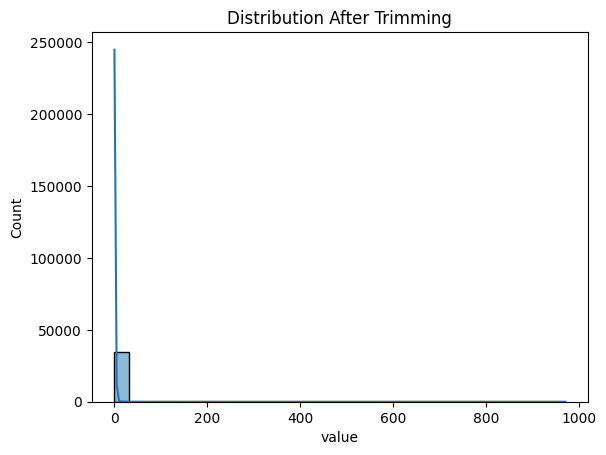

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_metabolomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()


In [42]:
#remove values less than 0.7:
final_metabolomics = final_metabolomics[final_metabolomics["value"] >= 0.7]
final_metabolomics

#remove values greater than 1.3:
final_metabolomics = final_metabolomics[final_metabolomics["value"] <= 1.3]
final_metabolomics


,sample,value,feature,view,group
4,UHBO-00913,0.856096,chem_id_100000707,metabolomics,group_metabolomics_wt
6,UHBO-00915,0.749288,chem_id_100000707,metabolomics,group_metabolomics_wt
7,UHBO-00916,1.000000,chem_id_100000707,metabolomics,group_metabolomics_wt
9,UHBO-00918,0.745915,chem_id_100000707,metabolomics,group_metabolomics_wt
10,UHBO-00919,1.269321,chem_id_100000707,metabolomics,group_metabolomics_wt
...,...,...,...,...,...
34432,UHBO-00943,1.260671,chem_id_100009122,metabolomics,group_metabolomics_wt
34433,UHBO-00944,1.039452,chem_id_100009122,metabolomics,group_metabolomics_wt
34437,UHBO-00948,1.172318,chem_id_100009122,metabolomics,group_metabolomics_wt
34438,UHBO-00949,0.903474,chem_id_100009122,metabolomics,group_metabolomics_wt


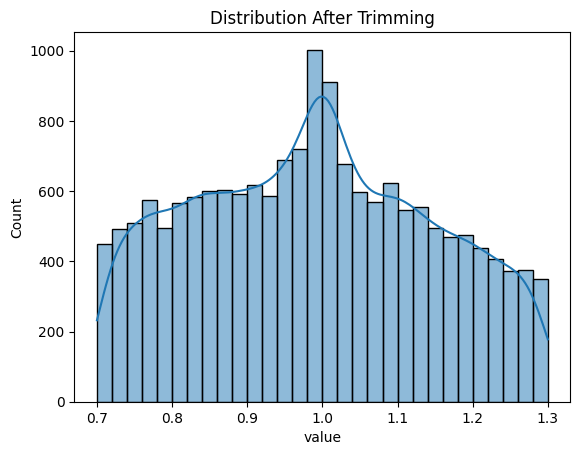

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_metabolomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [44]:
#transcriptomics 

In [45]:
#load transcriptomics HC data by identifier
transcriptomics_kc=pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_data/CountMatrix_KupfferCells_WT_RNASeq_kallistoImport (1).csv")
transcriptomics_kc

,Unnamed: 0,5819,5820,5821,5822,5823,5824,5825,5826,5827,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,ENSMUSG00000000001.4,103,223,38,150,130,233,164,265,354,...,142,904,607,1221,2636,1029,1005,655,1642,1125
1,ENSMUSG00000000003.15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028.14,13,0,0,24,0,0,0,21,47,...,0,62,3,37,214,54,89,114,29,200
3,ENSMUSG00000000031.16,0,0,0,0,0,0,0,0,0,...,0,0,1,61,0,0,0,0,0,0
4,ENSMUSG00000000037.16,0,0,2,0,0,3,0,0,0,...,0,2,0,2,2,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,ENSMUSG00000115846.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53460,ENSMUSG00000115847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53461,ENSMUSG00000115848.1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
53462,ENSMUSG00000115849.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
gene_kc= pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT_KO_data/RowAnno_KupfferCells_RNAseq.csv")
print(gene_kc.columns)  # Print the column names to identify the correct column name
gene_kc.head()

Index(['Unnamed: 0', 'GENEID', 'SYMBOL', 'GENETYPE'], dtype='object')


,Unnamed: 0,GENEID,SYMBOL,GENETYPE
0,ENSMUSG00000000001.4,ENSMUSG00000000001.4,Gnai3,protein_coding
1,ENSMUSG00000000003.15,ENSMUSG00000000003.15,Pbsn,protein_coding
2,ENSMUSG00000000028.14,ENSMUSG00000000028.14,Cdc45,protein_coding
3,ENSMUSG00000000031.16,ENSMUSG00000000031.16,H19,lincRNA
4,ENSMUSG00000000037.16,ENSMUSG00000000037.16,Scml2,protein_coding


In [47]:
#merge symbol to the unamed column
transcriptomics_kc['Unnamed: 0'] =  gene_kc['SYMBOL'] 
transcriptomics_kc.head()

,Unnamed: 0,5819,5820,5821,5822,5823,5824,5825,5826,5827,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,Gnai3,103,223,38,150,130,233,164,265,354,...,142,904,607,1221,2636,1029,1005,655,1642,1125
1,Pbsn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cdc45,13,0,0,24,0,0,0,21,47,...,0,62,3,37,214,54,89,114,29,200
3,H19,0,0,0,0,0,0,0,0,0,...,0,0,1,61,0,0,0,0,0,0
4,Scml2,0,0,2,0,0,3,0,0,0,...,0,2,0,2,2,0,0,0,0,13


In [48]:
trans_kc_lenghts = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/Wt_KO_data/Indentifires_kc - Copy.csv")
trans_kc_lenghts.head()

,Unnamed: 0.1,Unnamed: 0,gene_length
0,0,ENSMUSG00000000001,38866.0
1,1,ENSMUSG00000000003,15722.0
2,2,ENSMUSG00000000028,31540.0
3,3,ENSMUSG00000000031,4695.0
4,4,ENSMUSG00000000037,175688.0


In [49]:
kc_lenghts = trans_kc_lenghts["gene_length"]
kc_lenghts.head()

0     38866.0
1     15722.0
2     31540.0
3      4695.0
4    175688.0
Name: gene_length, dtype: float64

In [50]:
#add gene length to the transcriptomics data
kc_lenghts.reset_index(drop=True, inplace=True)
transcriptomics_kc["gene_length"] = kc_lenghts
transcriptomics_kc.head()
transcriptomics_kc

,Unnamed: 0,5819,5820,5821,5822,5823,5824,5825,5826,5827,...,5954,5979,5980,5981,5982,6024,6025,6026,6027,gene_length
0,Gnai3,103,223,38,150,130,233,164,265,354,...,904,607,1221,2636,1029,1005,655,1642,1125,38866.0
1,Pbsn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15722.0
2,Cdc45,13,0,0,24,0,0,0,21,47,...,62,3,37,214,54,89,114,29,200,31540.0
3,H19,0,0,0,0,0,0,0,0,0,...,0,1,61,0,0,0,0,0,0,4695.0
4,Scml2,0,0,2,0,0,3,0,0,0,...,2,0,2,2,0,0,0,0,13,175688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,AC107711.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
53460,AC109172.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380.0
53461,AC114008.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1346.0
53462,AC156016.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354.0


In [51]:
#TPM normalization:
from bioinfokit.analys import norm

# Set 'Unnamed: 0' as the index
transcriptomics_kc.set_index('Unnamed: 0', inplace=True)

nm = norm()
nm.tpm(transcriptomics_kc, gl='gene_length')
tpm_df_kc = nm.tpm_norm
tpm_df_kc.head()
tpm_df_kc.shape

(49417, 30)

In [52]:
#remove % of features with 0 values:
df_reset = tpm_df_kc.reset_index(drop=False)
data = []
for i in df_reset.columns:
     #print(df_reset[i].eq(0).mean())
     if df_reset[i].eq(0).mean() <= 0.63:
        data.append(df_reset[i])
df_hepatocyte_1 = pd.DataFrame(data)
print(df_hepatocyte_1.shape)

(24, 49417)


In [53]:
df= df_hepatocyte_1.T
df

,Unnamed: 0,5820,5821,5823,5824,5827,5828,5859,5860,5861,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,Gnai3,5.117969,0.434593,1.874695,2.8373,2.964545,3.091528,2.931694,2.455149,2.98873,...,5.781915,8.755672,4.971492,8.645722,12.750548,14.665687,2.066018,0.695807,4.256829,2.616294
1,Pbsn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cdc45,0.0,0.0,0.0,0.0,0.485021,0.0,0.0,0.800448,0.974896,...,0.0,0.739982,0.030278,0.322846,1.275573,0.948394,0.225458,0.149231,0.092644,0.573155
3,H19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0678,3.575606,0.0,0.0,0.0,0.0,0.0,0.0
4,Scml2,0.0,0.00506,0.0,0.008082,0.0,0.0,0.0,0.004871,0.0,...,0.0,0.004285,0.0,0.003133,0.00214,0.0,0.0,0.0,0.0,0.006688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49412,AC154323.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49413,AC109172.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.284387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49414,AC114008.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.362606,...,1.175731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49415,AC156016.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
data = []
for i in range(len(df)):
     #print(df.iloc[i].eq(0).mean())
     if df.iloc[i, 1:].eq(0).mean() <= 0.25:
        data.append(df.iloc[i])
hc_remove_rows = pd.DataFrame(data)
hc_remove_rows

,Unnamed: 0,5820,5821,5823,5824,5827,5828,5859,5860,5861,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
0,Gnai3,5.117969,0.434593,1.874695,2.837300,2.964545,3.091528,2.931694,2.455149,2.988730,...,5.781915,8.755672,4.971492,8.645722,12.750548,14.665687,2.066018,0.695807,4.256829,2.616294
5,Apoh,4.808905,4.767696,20.283551,2.664796,4.609008,3.065954,5.203485,6.517109,9.109780,...,1.514771,0.927286,0.716923,0.511345,0.632464,0.483430,10.125347,3.817697,1.306253,6.409835
6,Narf,2.541298,0.238938,0.090385,1.831761,1.154744,0.720517,0.857898,2.438180,2.177583,...,5.019058,7.588208,2.652263,5.947008,5.719877,3.543405,2.164639,0.821176,6.104131,2.380767
7,Cav2,2.474641,0.000000,0.000000,2.267930,0.000000,1.207330,0.093607,0.215839,0.738563,...,1.197378,2.136143,0.682407,1.041127,1.114238,2.305142,0.292188,0.536267,0.000000,0.398932
8,Klf6,76.268011,4.987623,19.055684,30.854619,29.144217,31.154599,42.000154,28.040165,27.875466,...,71.384525,65.766444,44.362324,92.887674,68.115531,131.583839,21.131108,7.847938,50.831628,25.101743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49369,AC160336.1,746.761663,346.199943,477.221908,284.083721,309.463327,350.014163,287.776998,494.971297,356.413513,...,1525.809438,915.589755,291.441435,588.947532,482.273175,1213.872815,121.085333,81.458546,399.301040,296.474498
49382,AC166369.3,0.000000,35.951960,9.616012,0.000000,22.336882,2.346601,2.729048,33.560832,25.121100,...,73.696462,3.690547,11.703048,12.141372,1.843118,4.073033,1.566634,0.708362,3.704367,0.886143
49384,CT009530.1,0.913820,0.375013,0.270207,0.028521,0.137300,0.115393,0.111833,0.850953,0.147061,...,4.005451,0.771292,0.268562,0.580460,0.487159,0.968063,0.072223,0.064690,0.388608,0.092598
49401,AC137871.4,0.000000,0.000000,0.000000,0.000000,0.119355,0.058514,0.045367,0.026152,0.000000,...,0.096720,0.391114,0.136185,0.067279,0.022980,0.067710,0.004883,0.012617,0.043107,0.022097


In [55]:
df =hc_remove_rows.set_index('Unnamed: 0').iloc[:,]
df.head()

,5820,5821,5823,5824,5827,5828,5859,5860,5861,5946,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gnai3,5.117969,0.434593,1.874695,2.837300,2.964545,3.091528,2.931694,2.455149,2.988730,5.175092,...,5.781915,8.755672,4.971492,8.645722,12.750548,14.665687,2.066018,0.695807,4.256829,2.616294
Apoh,4.808905,4.767696,20.283551,2.664796,4.609008,3.065954,5.203485,6.517109,9.109780,0.834545,...,1.514771,0.927286,0.716923,0.511345,0.632464,0.483430,10.125347,3.817697,1.306253,6.409835
Narf,2.541298,0.238938,0.090385,1.831761,1.154744,0.720517,0.857898,2.438180,2.177583,2.621084,...,5.019058,7.588208,2.652263,5.947008,5.719877,3.543405,2.164639,0.821176,6.104131,2.380767
Cav2,2.474641,0.000000,0.000000,2.267930,0.000000,1.207330,0.093607,0.215839,0.738563,1.816693,...,1.197378,2.136143,0.682407,1.041127,1.114238,2.305142,0.292188,0.536267,0.000000,0.398932
Klf6,76.268011,4.987623,19.055684,30.854619,29.144217,31.154599,42.000154,28.040165,27.875466,80.266140,...,71.384525,65.766444,44.362324,92.887674,68.115531,131.583839,21.131108,7.847938,50.831628,25.101743


In [56]:
#log2 transformation:
#tpm_df_kc = np.log2(df + 1)
#tpm_df_kc

In [57]:
#remove 10% of the rows randomly:
transcriptomics_remove_rows = df.sample(frac=0.9)
transcriptomics_remove_rows


,5820,5821,5823,5824,5827,5828,5859,5860,5861,5946,...,5953,5954,5979,5980,5981,5982,6024,6025,6026,6027
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Pde1c,0.041333,0.009154,0.009619,0.008935,0.021226,0.009037,0.000318,0.032312,0.004188,0.014264,...,0.103206,0.023903,0.000546,0.018420,0.053881,0.077954,0.000274,0.001701,0.004842,0.002017
Baiap2,0.041800,0.006943,0.682878,0.184821,0.457571,0.605683,0.385534,0.126995,0.343070,0.813580,...,0.074159,0.305763,0.298339,0.159055,0.234928,0.484547,0.195942,0.012254,0.000000,0.108714
Cul9,0.603542,0.223141,1.492450,1.404886,1.328462,1.818032,0.230875,0.877917,1.416818,1.959202,...,2.486958,1.084545,2.014878,1.567757,1.239205,1.342031,0.054061,0.049564,0.624574,0.234765
Lpar6,17.347568,14.489992,9.342999,20.512650,14.227328,18.619813,12.992677,7.291509,5.604771,26.478153,...,20.518136,22.729778,9.905213,12.947199,18.489896,32.626513,3.596092,1.659448,7.278371,4.252303
Gm10221,222.998856,295.850251,243.843500,397.986445,455.461040,327.945060,174.729985,191.721700,242.448912,584.674239,...,524.086118,477.877919,527.093105,570.959860,677.525337,496.381103,88.718308,52.547575,60.520695,113.276660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc39a9,2.961337,0.551974,3.494187,3.550299,2.631293,2.317163,2.092831,2.266434,2.993290,4.086281,...,5.695023,4.216646,3.589896,6.270022,5.021666,3.298972,0.672249,0.297159,2.527971,0.925421
Sh3bp5,9.493796,0.740848,3.721894,6.801266,4.459453,5.553644,5.823126,6.519759,7.724729,13.983537,...,12.004317,13.274404,10.377097,12.640956,12.412636,14.982742,2.590998,0.892416,4.852945,5.514674
Pard3b,0.016889,0.003987,0.003351,0.010376,0.012974,0.014312,0.046974,0.006823,0.004864,0.004417,...,0.006308,0.001125,0.000317,0.015907,0.008056,0.007728,0.000557,0.000576,0.017371,0.005495


In [58]:
import pandas as pd

num_features = 700  
gene_variance = tpm_df_kc.var(axis=1)  # Use tpm_df_kc instead of df_kc

top_features = gene_variance.nlargest(num_features).index

df = tpm_df_kc.loc[top_features]  # Use tpm_df_kc instead of df_kc

print("Shape after feature selection:", df.shape)  # Corrected to print the shape of the resulting DataFrame

Shape after feature selection: (702, 30)


In [59]:
#transcriptomics KC data:

#view2_1= {"ENSMUSG" : "transcriptomics_KC"}

data_list = []
 
for i in range(len(transcriptomics_remove_rows)):
    row = transcriptomics_remove_rows.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = transcriptomics_remove_rows.index[i] 
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "transcriptomics_KC"

    
    
    row['group'] = "group_KC_wt"
    data_list.append(row)


final_trans_kc = pd.concat(data_list, ignore_index=True)
final_trans_kc

KeyboardInterrupt: 

In [ ]:
#add ID + all samples columns, like id_30
final_trans_kc["sample"] = "ID_" + final_trans_kc["sample"] 
final_trans_kc


,sample,value,feature,view,group
0,ID_5820,3.347189,Pias4,transcriptomics_KC,group_KC_wt
1,ID_5821,0.151633,Pias4,transcriptomics_KC,group_KC_wt
2,ID_5823,1.070706,Pias4,transcriptomics_KC,group_KC_wt
3,ID_5824,3.455079,Pias4,transcriptomics_KC,group_KC_wt
4,ID_5827,3.486416,Pias4,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
305251,ID_5982,0.860617,Ppm1f,transcriptomics_KC,group_KC_wt
305252,ID_6024,0.597395,Ppm1f,transcriptomics_KC,group_KC_wt
305253,ID_6025,0.256584,Ppm1f,transcriptomics_KC,group_KC_wt
305254,ID_6026,0.652266,Ppm1f,transcriptomics_KC,group_KC_wt


In [ ]:
#remove missing values:
final_trans_kc= final_trans_kc[final_trans_kc["value"] != 0]
final_trans_kc

,sample,value,feature,view,group
0,ID_5820,3.347189,Pias4,transcriptomics_KC,group_KC_wt
1,ID_5821,0.151633,Pias4,transcriptomics_KC,group_KC_wt
2,ID_5823,1.070706,Pias4,transcriptomics_KC,group_KC_wt
3,ID_5824,3.455079,Pias4,transcriptomics_KC,group_KC_wt
4,ID_5827,3.486416,Pias4,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
305251,ID_5982,0.860617,Ppm1f,transcriptomics_KC,group_KC_wt
305252,ID_6024,0.597395,Ppm1f,transcriptomics_KC,group_KC_wt
305253,ID_6025,0.256584,Ppm1f,transcriptomics_KC,group_KC_wt
305254,ID_6026,0.652266,Ppm1f,transcriptomics_KC,group_KC_wt


In [ ]:
final_trans_kc['value'].describe()

count    294297.000000
mean         68.261136
std        1466.028613
min           0.000025
25%           0.367303
50%           1.740532
75%           7.609715
max      147727.118329
Name: value, dtype: float64

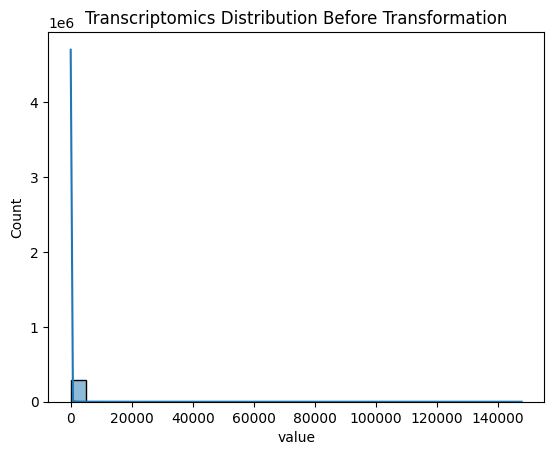

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_trans_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()


In [ ]:
#remove values less than 0.3:

final_trans_kc = final_trans_kc[final_trans_kc["value"] >= 0]
final_trans_kc

#remove values greater than 4:
final_trans_kc = final_trans_kc[final_trans_kc["value"] <= 7.5]
final_trans_kc


,sample,value,feature,view,group
0,ID_5820,3.347189,Pias4,transcriptomics_KC,group_KC_wt
1,ID_5821,0.151633,Pias4,transcriptomics_KC,group_KC_wt
2,ID_5823,1.070706,Pias4,transcriptomics_KC,group_KC_wt
3,ID_5824,3.455079,Pias4,transcriptomics_KC,group_KC_wt
4,ID_5827,3.486416,Pias4,transcriptomics_KC,group_KC_wt
...,...,...,...,...,...
305251,ID_5982,0.860617,Ppm1f,transcriptomics_KC,group_KC_wt
305252,ID_6024,0.597395,Ppm1f,transcriptomics_KC,group_KC_wt
305253,ID_6025,0.256584,Ppm1f,transcriptomics_KC,group_KC_wt
305254,ID_6026,0.652266,Ppm1f,transcriptomics_KC,group_KC_wt


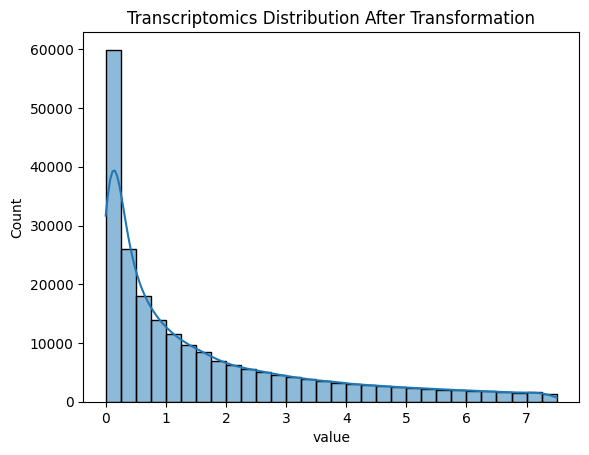

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_trans_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution After Transformation")
plt.show()


In [ ]:
final_trans_kc.describe()

,value
count,220046.000000
mean,1.624368
std,1.852425
min,0.000025
25%,0.213938
50%,0.852352
75%,2.445587
max,7.499553


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
merged_df = pd.concat([final_lipodomics, final_metabolomics, final_trans_kc], ignore_index=True)
merged_df

,sample,value,feature,view,group
0,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
2,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
3,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
4,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
241912,ID_5982,0.860617,Ppm1f,transcriptomics_KC,group_KC_wt
241913,ID_6024,0.597395,Ppm1f,transcriptomics_KC,group_KC_wt
241914,ID_6025,0.256584,Ppm1f,transcriptomics_KC,group_KC_wt
241915,ID_6026,0.652266,Ppm1f,transcriptomics_KC,group_KC_wt


In [ ]:
merged_df['value'].describe()

count    241917.000000
mean          1.590525
std           1.783958
min           0.000025
25%           0.254253
50%           0.924685
75%           2.289418
max           7.499553
Name: value, dtype: float64

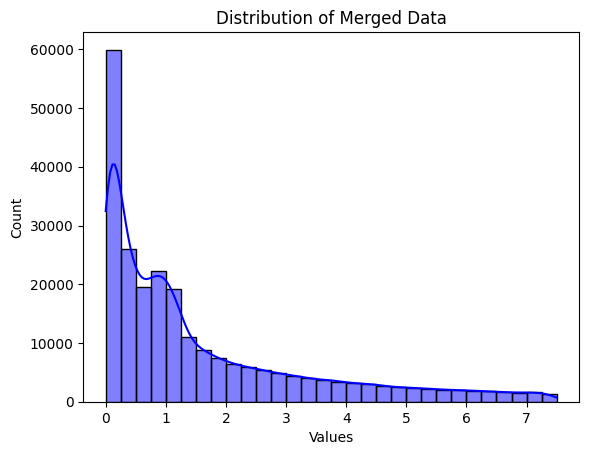

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(merged_df["value"], kde=True, bins=30, color='blue')

plt.title("Distribution of Merged Data")
plt.xlabel("Values")
plt.ylabel("Count")
plt.show()


In [ ]:
merged_df.describe()

,value
count,241917.000000
mean,1.590525
std,1.783958
min,0.000025
25%,0.254253
50%,0.924685
75%,2.289418
max,7.499553


In [ ]:
#set data options:

ent.set_data_options(scale_views = True)  

Scaling views to unit variance...



In [ ]:
merged_df = merged_df.drop_duplicates(subset=['group', 'view', 'feature', 'sample'], keep='first')

merged_df

,sample,value,feature,view,group
0,HFD_HFD_CD_601,4.598996,DAG(36:1),Lipidomics,group_lipidomics_wt
1,CD_CD_CD_106,4.597894,PS(40:4),Lipidomics,group_lipidomics_wt
2,HFD_CD_HFD_703,4.597724,PS(40:7),Lipidomics,group_lipidomics_wt
3,CD_CD_CD_106,4.597488,TAG(58:8)_TAG,Lipidomics,group_lipidomics_wt
4,CD_CD_CD_105,4.596501,TAG(58:9)_TAG,Lipidomics,group_lipidomics_wt
...,...,...,...,...,...
241912,ID_5982,0.860617,Ppm1f,transcriptomics_KC,group_KC_wt
241913,ID_6024,0.597395,Ppm1f,transcriptomics_KC,group_KC_wt
241914,ID_6025,0.256584,Ppm1f,transcriptomics_KC,group_KC_wt
241915,ID_6026,0.652266,Ppm1f,transcriptomics_KC,group_KC_wt


In [ ]:
# Set the data for MOFA+
ent.set_data_df(merged_df)



No data found for group='group_KC_wt' and view='Lipidomics'...
No data found for group='group_KC_wt' and view='metabolomics'...
Loaded group='group_KC_wt' view='transcriptomics_KC' with N=23 samples and D=12357 features...
Loaded group='group_lipidomics_wt' view='Lipidomics' with N=23 samples and D=306 features...
No data found for group='group_lipidomics_wt' and view='metabolomics'...
No data found for group='group_lipidomics_wt' and view='transcriptomics_KC'...
No data found for group='group_metabolomics_wt' and view='Lipidomics'...
Loaded group='group_metabolomics_wt' view='metabolomics' with N=42 samples and D=818 features...
No data found for group='group_metabolomics_wt' and view='transcriptomics_KC'...




In [ ]:
#set model options
ent.set_model_options(
    factors= 10,
    spikeslab_weights=True,
    ard_weights=True
)


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (Lipidomics): gaussian
- View 1 (metabolomics): gaussian
- View 2 (transcriptomics_KC): gaussian




In [ ]:
#set training options
ent.set_train_options(
    convergence_mode="fast",
    dropR2=0.001,
    gpu_mode=False,
    seed=1
    )

In [ ]:
# Convert object columns to strings

ent.build()
ent.run()

ent.save("s_filtering_10%_wt_mofa_model.hdf5")



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -2339717.05 

Iteration 1: time=0.34, ELBO=-428598.23, deltaELBO=1911118.817 (81.68162118%), Factors=9
Iteration 2: time=0.31, ELBO=-337324.63, deltaELBO=91273.602 (3.90105301%), Factors=9
Iteration 3: time=0.30, ELBO=-311701.54, deltaELBO=25623.088 (1.09513617%), Factors=9
Iteration 4: time=0.31, ELBO=-302414.83, deltaELBO=9286.715 (0.39691617%), Factors=9
Iteration 5: time=0.30, ELBO=-297979.57, deltaELBO=4435.255 (0.18956373%), Factors=9
Iteration 6: time=0.30, ELBO=-295569.85, deltaELBO=2409.726 (0.10299220%), Factors=9
Iteration 7: time=0.31, ELBO=-294108.47, deltaELBO=1461.378 (0.06245960%), Factors=9
Iteration 8: time=0.30, ELBO=-293136.98, deltaELBO=971.489 (0.04152164%), Factors=9
Iteration 9: time=0.31, ELBO=-292383.09, deltaELBO=753.891 (0.03222147%), Factors=9
Iteration 10: time=0.31, ELBO=-291693.15, deltaELBO=689.942 (0.02948829%), F